<a href="https://colab.research.google.com/github/Nadezda-Sut/EEG/blob/main/MNE_Connectivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 30.6 MB/s eta 0:00:00


In [22]:
!pip install autoreject

In [20]:

!pip install -U mne-connectivity

In [23]:
import matplotlib
import pathlib
import mne
import pandas as pd
import numpy as np
from autoreject  import AutoReject
ar = AutoReject()
from mne_connectivity import spectral_connectivity_epochs



In [ ]:
#main_folder = pathlib.Path().cwd()

#input_folder = pathlib.Path('D:/eeg_connectivity')
#output_folder = pathlib.Path('D:/eeg_connectivity/output')



#files = [file for file in input_folder.iterdir() if file.suffix == '.fif']

#files = 'D:/eeg_connectivity/VatEvgDoICA.set'


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')


# path to file in google drive

file_path = "/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.set"


Mounted at /content/gdrive


In [5]:
input_file = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.set'
output_file = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif'

# Read the EEG data from the input file
raw = mne.io.read_raw_eeglab(input_file, preload=True)

# Save the EEG data to the output file in FIF format
raw.save(output_file, overwrite=True)

Reading /content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fdt
Reading 0 ... 61924  =      0.000 ...   241.891 secs...
Overwriting existing file.
Writing /content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif


<ipython-input-5-664dc7b7bada>:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(input_file, preload=True)
<ipython-input-5-664dc7b7bada>:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(input_file, preload=True)
<ipython-input-5-664dc7b7bada>:8: RuntimeWarning: This filename (/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_file, overwrite=True)


Closing /content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif
[done]


In [6]:
file = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif'

# Convert .ced to .csv

In [7]:
import csv
import re

def convert_ced_to_csv(ced_file, csv_file):
    # Open the .ced file for reading
    with open(ced_file, 'r') as ced:
        # Create a CSV writer object
        csv_writer = csv.writer(csv_file)

        # Write the header row
        csv_writer.writerow(["Electrode Label", "X", "Y", "Z"])

        # Read the .ced file line by line
        for line in ced:
            # Parse the electrode label and coordinates from each line
            match = re.match(r'(\w+)\s+([\d.-]+)\s+([\d.-]+)\s+([\d.-]+)', line)
            if match:
                electrode_label = match.group(1)
                x_coord = match.group(2)
                y_coord = match.group(3)
                z_coord = match.group(4)

                # Write the electrode information as a row in the CSV file
                csv_writer.writerow([electrode_label, x_coord, y_coord, z_coord])

# Example usage: Convert example.ced to example.csv
ced_file = '/content/gdrive/My Drive/Colab Notebooks/Channels.ced'
csv_file = '/content/gdrive/My Drive/Colab Notebooks/Channels.csv'

with open(csv_file, 'w', newline='') as output_csv:
    convert_ced_to_csv(ced_file, output_csv)

In [8]:
montage = mne.channels.read_custom_montage("/content/gdrive/My Drive/Colab Notebooks/Channels.csv")

In [11]:
epochs_duration = 3.
epochs_overlap = 0.5

con_methods = ['wpli']
#, 'imcoh', 'ciplv', 'ppc', 'coh'
con_freqs = ['4-8']
#con_freqs = ['4-30', '4-8', '8-13','13-20', '20-30', '8-10', '10-13']

In [12]:
freqs_min = [int(x.split('-')[0]) for x in con_freqs]
freqs_max = [int(x.split('-')[1]) for x in con_freqs]
sen_or_sour = 'sensors'

In [13]:
def epoching(raw, duration, overlap):
  tmin = 0
  tmax = duration
  duration = duration - overlap
  events=mne.make_fixed_length_events(raw, id=1,duration=duration)
  picks = mne.pick_types( raw.info , meg=False, eeg=True, eog=False)
  epochs = mne.Epochs(raw, events=events, tmin=tmin, baseline = (0, 0),
                      tmax=tmax, picks=picks, reject_by_annotation=True)
  epochs.drop_bad()
  return epochs


In [14]:
raw = mne.io.read_raw_fif(file, preload=True)

Opening raw data file /content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif...
    Range : 0 ... 61924 =      0.000 ...   241.891 secs
Ready.
Reading 0 ... 61924  =      0.000 ...   241.891 secs...


<ipython-input-14-8f81574964f6>:1: RuntimeWarning: This filename (/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


In [15]:
epochs = epoching(raw,4.,0.5)


Not setting metadata
69 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 69 events and 1025 original time points ...
1 bad epochs dropped


In [16]:
output_folder = pathlib.Path('/content/gdrive/My Drive/Colab Notebooks')

In [17]:
person = 'VatEvgDo_matrix'
freqs = raw.info['sfreq']

In [18]:
def calculate_conn(data, con_methods, sfreq, freqs_min, freqs_max, node_names, person, output_folder):

    for con_method in con_methods:
        con = spectral_connectivity_epochs(data, method = con_methods,
                                                                                       mode = 'multitaper',
                                                                                       sfreq=sfreq, fmin=freqs_min,
                                                                                       fmax = freqs_max, faverage = True,
                                                                                       mt_adaptive = True, n_jobs = -1)
        con = con.get_data(output='dense')

    for shp in range(0, con.shape[2]):
        output_filename = f'{output_folder}/{person}_{sen_or_sour}_{con_method}.csv'
        savefile = pd.DataFrame(np.array(con[:,:,shp]))
        savefile.columns = savefile.index = node_names

        savefile.to_csv(output_filename)



In [24]:
calculate_conn(epochs, con_methods, epochs.info['sfreq'], freqs_min, freqs_max, epochs.info['ch_names'], person, output_folder)

Adding metadata with 3 columns
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1596 connections
    using t=0.000s..4.000s for estimation (1025 points)
    frequencies: 4.2Hz..8.0Hz (16 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..1


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 2..2


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 3..3
    computing connectivity for epochs 4..4


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 5..5
    computing connectivity for epochs 6..6


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 7..7
    computing connectivity for epochs 8..8
    computing connectivity for epochs 9..9


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 10..10
    computing connectivity for epochs 11..11


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 12..12
    computing connectivity for epochs 13..13
    computing connectivity for epochs 14..14


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 15..15
    computing connectivity for epochs 16..16
    computing connectivity for epochs 17..17


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 18..18
    computing connectivity for epochs 19..19
    computing connectivity for epochs 20..20


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 21..21


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 22..22
    computing connectivity for epochs 23..23


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 24..24
    computing connectivity for epochs 25..25


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 26..26
    computing connectivity for epochs 27..27
    computing connectivity for epochs 28..28


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 29..29
    computing connectivity for epochs 30..30


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 31..31
    computing connectivity for epochs 32..32


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 33..33
    computing connectivity for epochs 34..34
    computing connectivity for epochs 35..35


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 36..36
    computing connectivity for epochs 37..37
    computing connectivity for epochs 38..38


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 39..39
    computing connectivity for epochs 40..40
    computing connectivity for epochs 41..41


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 42..42


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 43..43
    computing connectivity for epochs 44..44
    computing connectivity for epochs 45..45


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 46..46
    computing connectivity for epochs 47..47
    computing connectivity for epochs 48..48


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 49..49
    computing connectivity for epochs 50..50


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 51..51
    computing connectivity for epochs 52..52


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 53..53
    computing connectivity for epochs 54..54
    computing connectivity for epochs 55..55


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 56..56
    computing connectivity for epochs 57..57


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 58..58
    computing connectivity for epochs 59..59


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 60..60
    computing connectivity for epochs 61..61


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 62..62
    computing connectivity for epochs 63..63
    computing connectivity for epochs 64..64


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 65..65


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 66..66
    computing connectivity for epochs 67..67
    computing connectivity for epochs 68..68


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


    assembling connectivity matrix
[Connectivity computation done]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [ ]:
import os

# Assuming the file is a CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'

# Read the CSV file into a DataFrame
con = pd.read_csv(file_path, index_col=0)

# Create a graph from the weighted adjacency matrix
G = nx.from_numpy_array(con.values)



In [ ]:
print(G)

Graph with 57 nodes and 1596 edges


In [ ]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Assortativity
assortativity = nx.degree_assortativity_coefficient(G)

# Transitivity
transitivity = nx.transitivity(G)

# Efficiency
efficiency = nx.global_efficiency(G)

# Modularity
#modularity = nx.community.modularity(nx.community.greedy_modularity_communities(G), G)

# Density
density = nx.density(G)

# Print or use the results as needed
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Assortativity:", assortativity)
print("Transitivity:", transitivity)
print("Efficiency:", efficiency)
#print("Modularity:", modularity)
print("Density:", density)

Degree Centrality: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 1.0, 56: 1.0}
Betweenness Centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51:

In [ ]:
import os
import numpy as np
import pandas as pd
import networkx as nx

# Assuming the file is a CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'

# Read the CSV file into a DataFrame
con = pd.read_csv(file_path, index_col=0)

# Create a graph from the weighted adjacency matrix
G = nx.from_numpy_array(con.values)

# Calculate global graph metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
assortativity = nx.degree_assortativity_coefficient(G)
transitivity = nx.transitivity(G)
average_clustering = nx.average_clustering(G)
density = nx.density(G)

# Print or use the results as needed
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("Assortativity:", assortativity)
print("Transitivity:", transitivity)
print("Average Clustering:", average_clustering)
print("Density:", density)


Degree Centrality: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 1.0, 56: 1.0}
Betweenness Centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51:

/usr/local/lib/python3.10/dist-packages/networkx/algorithms/assortativity/correlation.py:302: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


In [25]:
import pandas as pd
import networkx as nx
import numpy as np

# Load the matrix from CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
matrix = pd.read_csv(file_path, index_col=0)

# Convert the DataFrame to a NumPy array for compatibility with NetworkX
adjacency_matrix = matrix.to_numpy()

# Create a graph from the adjacency matrix
graph = nx.Graph(adjacency_matrix)

# Calculate node degrees
node_degrees = dict(graph.degree())

# Calculate network density
density = nx.density(graph)

# Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(graph)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(graph)

# Calculate modularity
modularity = nx.community.modularity_max.greedy_modularity_communities(graph)

# Calculate graph diameter
diameter = nx.diameter(graph)

# Calculate connected components
connected_components = list(nx.connected_components(graph))

# Display the results
print("Node Degrees:", node_degrees)
print("Network Density:", density)
print("Clustering Coefficient:", clustering_coefficient)
print("Betweenness Centrality:", betweenness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("Modularity:", modularity)
print("Graph Diameter:", diameter)
print("Connected Components:", connected_components)


Node Degrees: {0: 56, 1: 56, 2: 56, 3: 56, 4: 56, 5: 56, 6: 56, 7: 56, 8: 56, 9: 56, 10: 56, 11: 56, 12: 56, 13: 56, 14: 56, 15: 56, 16: 56, 17: 56, 18: 56, 19: 56, 20: 56, 21: 56, 22: 56, 23: 56, 24: 56, 25: 56, 26: 56, 27: 56, 28: 56, 29: 56, 30: 56, 31: 56, 32: 56, 33: 56, 34: 56, 35: 56, 36: 56, 37: 56, 38: 56, 39: 56, 40: 56, 41: 56, 42: 56, 43: 56, 44: 56, 45: 56, 46: 56, 47: 56, 48: 56, 49: 56, 50: 56, 51: 56, 52: 56, 53: 56, 54: 56, 55: 56, 56: 56}
Network Density: 1.0
Clustering Coefficient: 1.0
Betweenness Centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0

In [26]:
import pandas as pd
import networkx as nx

# Read the CSV file containing the weighted adjacency matrix
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv', index_col=0)

# Create a graph from the DataFrame
G = nx.from_pandas_adjacency(df)

# Calculate Average Degree
average_degree = sum(dict(G.degree(weight='weight')).values()) / len(G)

# Calculate Assortativity
assortativity = nx.degree_assortativity_coefficient(G, weight='weight')

# Calculate Density
density = nx.density(G)

# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Print or use the calculated values
print("Average Degree:", average_degree)
print("Assortativity:", assortativity)
print("Density:", density)
print("Betweenness Centrality:", betweenness_centrality)


Average Degree: 12.16386659228386
Assortativity: -0.01785714285715376
Density: 1.0
Betweenness Centrality: {'AF7': 0.00909090909090909, 'AF3': 0.04350649350649351, 'Fp1': 0.0025974025974025974, 'Fp2': 0.0, 'AF4': 0.001948051948051948, 'F5': 0.0006493506493506494, 'F3': 0.001948051948051948, 'F1': 0.016883116883116882, 'F2': 0.0006493506493506494, 'F4': 0.0, 'F6': 0.0025974025974025974, 'F8': 0.003246753246753247, 'FT7': 0.0, 'FC5': 0.0025974025974025974, 'FC3': 0.02727272727272727, 'FC1': 0.0012987012987012987, 'FC2': 0.0012987012987012987, 'FC4': 0.0, 'FC6': 0.005194805194805195, 'FT8': 0.003896103896103896, 'T3': 0.0, 'C5': 0.17207792207792208, 'C3': 0.016233766233766232, 'C1': 0.0, 'C2': 0.0, 'C4': 0.044805194805194806, 'C6': 0.006493506493506494, 'T4': 0.008441558441558441, 'TP7': 0.0, 'CP5': 0.11688311688311688, 'CP3': 0.006493506493506494, 'CP1': 0.0, 'CP2': 0.0, 'CP4': 0.0, 'CP6': 0.001948051948051948, 'TP8': 0.003246753246753247, 'T5': 0.0006493506493506494, 'P5': 0.00259740259

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
np.fill_diagonal(connectivity_matrix.values, 0)

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Calculate Global Connectivity Index
global_connectivity_index = connectivity_matrix.mean().mean()

# Calculate Network Density
network_density = np.sum(binary_matrix.values) / (len(binary_matrix) * (len(binary_matrix) - 1))

# Calculate Average Connectivity Strength
average_connectivity_strength = connectivity_matrix.mean().mean()

# Calculate Network Integration or Efficiency
network_efficiency = 1 / np.mean(squareform(connectivity_matrix.values))

# Calculate Clustering Coefficient
clustering_coefficient = np.mean(binary_matrix.corr().mean())

# Calculate Network Modularity (optional, requires additional libraries)
# If interested, you can use community detection algorithms to calculate modularity

# Visualization
# Plot the weighted connectivity matrix
sns.heatmap(connectivity_matrix, cmap='viridis', square=True, xticklabels=False, yticklabels=False)
plt.title('Weighted Connectivity Matrix')
plt.show()

# Create a hierarchical clustering dendrogram
linkage_matrix = linkage(connectivity_matrix.values, method='average', metric='euclidean')
dendrogram(linkage_matrix, labels=connectivity_matrix.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


ValueError: ignored

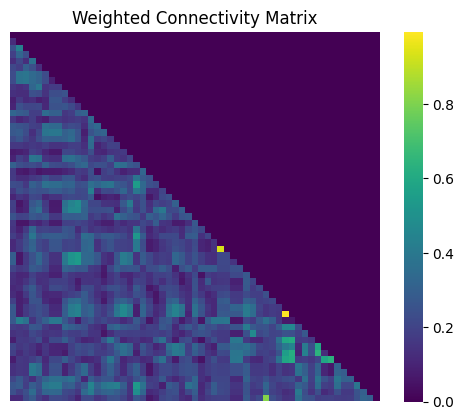

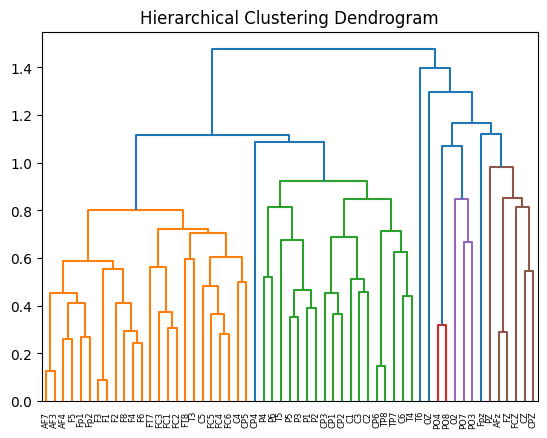

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Load the CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
np.fill_diagonal(connectivity_matrix.values, 0)

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Calculate Global Connectivity Index
global_connectivity_index = connectivity_matrix.mean().mean()

# Calculate Network Density
network_density = np.sum(binary_matrix.values) / (len(binary_matrix) * (len(binary_matrix) - 1))

# Calculate Average Connectivity Strength
average_connectivity_strength = connectivity_matrix.mean().mean()

# Calculate Network Integration or Efficiency using networkx
G = nx.from_pandas_adjacency(connectivity_matrix)
network_efficiency = nx.global_efficiency(G)

# Calculate Clustering Coefficient
clustering_coefficient = np.mean(binary_matrix.corr().mean())

# Visualization
# Plot the weighted connectivity matrix
sns.heatmap(connectivity_matrix, cmap='viridis', square=True, xticklabels=False, yticklabels=False)
plt.title('Weighted Connectivity Matrix')
plt.show()

# Create a hierarchical clustering dendrogram
linkage_matrix = linkage(connectivity_matrix.values, method='average', metric='euclidean')
dendrogram(linkage_matrix, labels=connectivity_matrix.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


Global Connectivity Index: 0.1067005841428409
Network Density: 0.006265664160401002
Average Connectivity Strength: 0.1067005841428409
Network Integration or Efficiency: 1.0
Clustering Coefficient: 0.18975210343052523


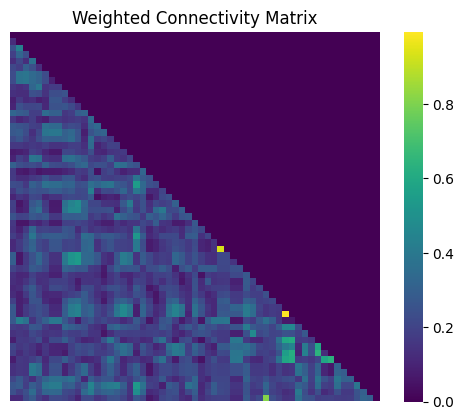

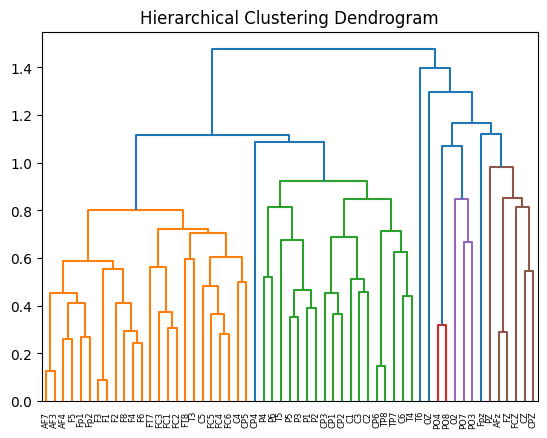

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
np.fill_diagonal(connectivity_matrix.values, 0)

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Calculate Global Connectivity Index
global_connectivity_index = connectivity_matrix.mean().mean()
print(f"Global Connectivity Index: {global_connectivity_index}")

# Calculate Network Density
network_density = np.sum(binary_matrix.values) / (len(binary_matrix) * (len(binary_matrix) - 1))
print(f"Network Density: {network_density}")

# Calculate Average Connectivity Strength
average_connectivity_strength = connectivity_matrix.mean().mean()
print(f"Average Connectivity Strength: {average_connectivity_strength}")

# Calculate Network Integration or Efficiency using networkx
G = nx.from_pandas_adjacency(connectivity_matrix)
network_efficiency = nx.global_efficiency(G)
print(f"Network Integration or Efficiency: {network_efficiency}")

# Calculate Clustering Coefficient
clustering_coefficient = np.mean(binary_matrix.corr().mean())
print(f"Clustering Coefficient: {clustering_coefficient}")

# Visualization
# Plot the weighted connectivity matrix
sns.heatmap(connectivity_matrix, cmap='viridis', square=True, xticklabels=False, yticklabels=False)
plt.title('Weighted Connectivity Matrix')
plt.show()

# Create a hierarchical clustering dendrogram
linkage_matrix = linkage(connectivity_matrix.values, method='average', metric='euclidean')
dendrogram(linkage_matrix, labels=connectivity_matrix.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


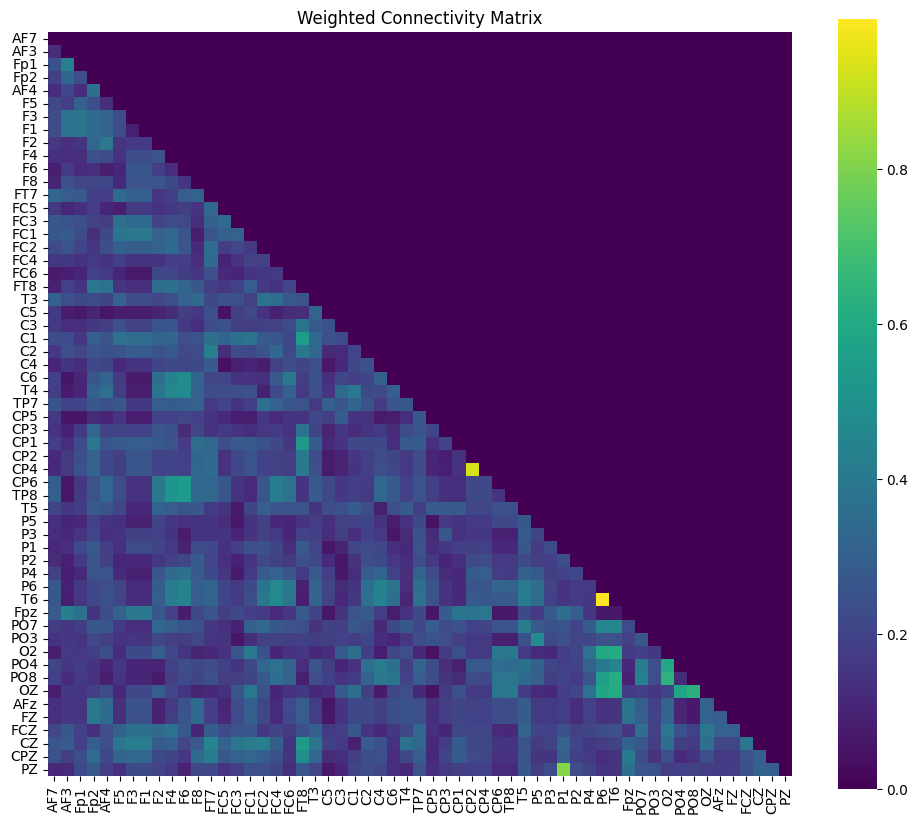

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
np.fill_diagonal(connectivity_matrix.values, 0)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(connectivity_matrix, cmap='viridis', square=True, xticklabels=True, yticklabels=True)
plt.title('Weighted Connectivity Matrix')
plt.show()


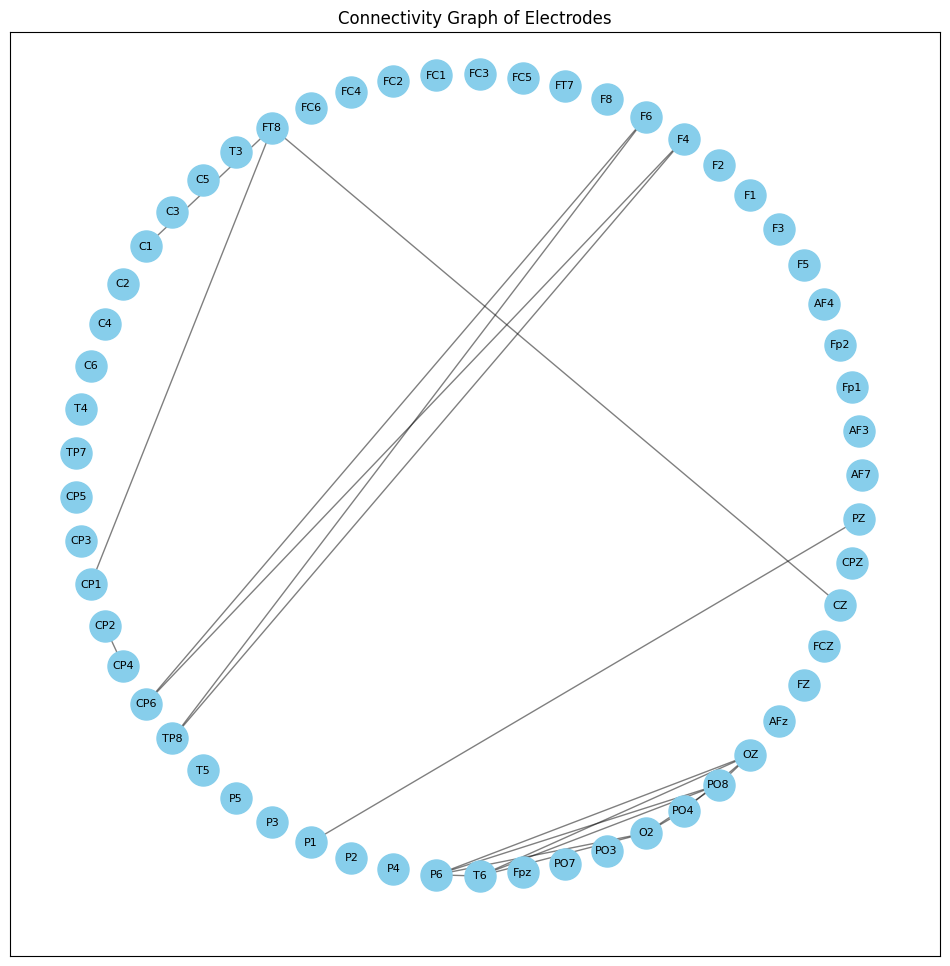

In [46]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

# Load the CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
np.fill_diagonal(connectivity_matrix.values, 0)

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Create a graph using networkx
G = nx.from_pandas_adjacency(binary_matrix)

# Positioning of nodes on the graph
pos = nx.circular_layout(G)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Connectivity Graph of Electrodes')
plt.show()


In [50]:
! pip install python-louvain

In [51]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community
from scipy.spatial.distance import squareform

# Load the CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
np.fill_diagonal(connectivity_matrix.values, 0)

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Create a graph using networkx
G = nx.from_pandas_adjacency(binary_matrix)

# Positioning of nodes on the graph
pos = nx.circular_layout(G)

# Perform Louvain community detection
partition = community.best_partition(G)

# Define electrode clusters based on your specified regions
clusters = {
    "left_frontal": ["FP1", "AF3", "AF7", "F1", "F5", "F3", "F7", "FT7", "FC5", "FC3", "FC1"],
    "right_frontal": ["FP2", "AF4", "AF8", "F2", "F4", "F6", "F8", "F8", "FC2", "FC4", "FC6", "FT8"],
    "middle_frontal": ["AFz", "Fpz", "Fz", "FCz"],
    "left_temporal": ["T3", "TP7", "CP5", "C5"],
    "right_temporal": ["T4", "TP8", "C6", "CP6"],
    "middle_central": ["Cz"],
    "left_central_parietal": ["C1", "C3", "CP3", "CP1"],
    "right_central_parietal": ["C2", "C4", "CP2", "CP4"],
    "middle_central_parietal": ["CPz", "Pz"],
    "left_parietal_occipital": ["P1", "P3", "P5", "T5", "PO3", "PO7", "O1"],
    "right_parietal_occipital": ["P2", "P4", "P6", "T6", "PO4", "PO8", "O2"],
    "middle_parietal_occipital": ["POz", "Oz"]
}

# Assign each electrode to a cluster based on Louvain partition
for electrode, cluster_id in partition.items():
    for cluster, electrode_list in clusters.items():
        if electrode in electrode_list:
            clusters[cluster].append(electrode)

# Draw the graph with nodes colored by clusters
colors = [clusters[cluster_id] for cluster_id in partition.values()]
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=colors, cmap=plt.cm.rainbow, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Connectivity Graph of Electrodes with Clusters')
plt.show()


AttributeError: ignored

In [52]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
from scipy.spatial.distance import squareform

# Load the CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
np.fill_diagonal(connectivity_matrix.values, 0)

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Create a graph using networkx
G = nx.from_pandas_adjacency(binary_matrix)

# Positioning of nodes on the graph
pos = nx.circular_layout(G)

# Perform Louvain community detection
partition = community_louvain.best_partition(G)

# Define electrode clusters based on your specified regions
clusters = {
    "left_frontal": ["FP1", "AF3", "AF7", "F1", "F5", "F3", "F7", "FT7", "FC5", "FC3", "FC1"],
    "right_frontal": ["FP2", "AF4", "AF8", "F2", "F4", "F6", "F8", "F8", "FC2", "FC4", "FC6", "FT8"],
    "middle_frontal": ["AFz", "Fpz", "Fz", "FCz"],
    "left_temporal": ["T3", "TP7", "CP5", "C5"],
    "right_temporal": ["T4", "TP8", "C6", "CP6"],
    "middle_central": ["Cz"],
    "left_central_parietal": ["C1", "C3", "CP3", "CP1"],
    "right_central_parietal": ["C2", "C4", "CP2", "CP4"],
    "middle_central_parietal": ["CPz", "Pz"],
    "left_parietal_occipital": ["P1", "P3", "P5", "T5", "PO3", "PO7", "O1"],
    "right_parietal_occipital": ["P2", "P4", "P6", "T6", "PO4", "PO8", "O2"],
    "middle_parietal_occipital": ["POz", "Oz"]
}

# Assign each electrode to a cluster based on Louvain partition
for electrode, cluster_id in partition.items():
    for cluster, electrode_list in clusters.items():
        if electrode in electrode_list:
            clusters[cluster].append(electrode)

# Draw the graph with nodes colored by clusters
colors = [clusters[cluster_id] for cluster_id in partition.values()]
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=colors, cmap=plt.cm.rainbow, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Connectivity Graph of Electrodes with Clusters')
plt.show()


AttributeError: ignored

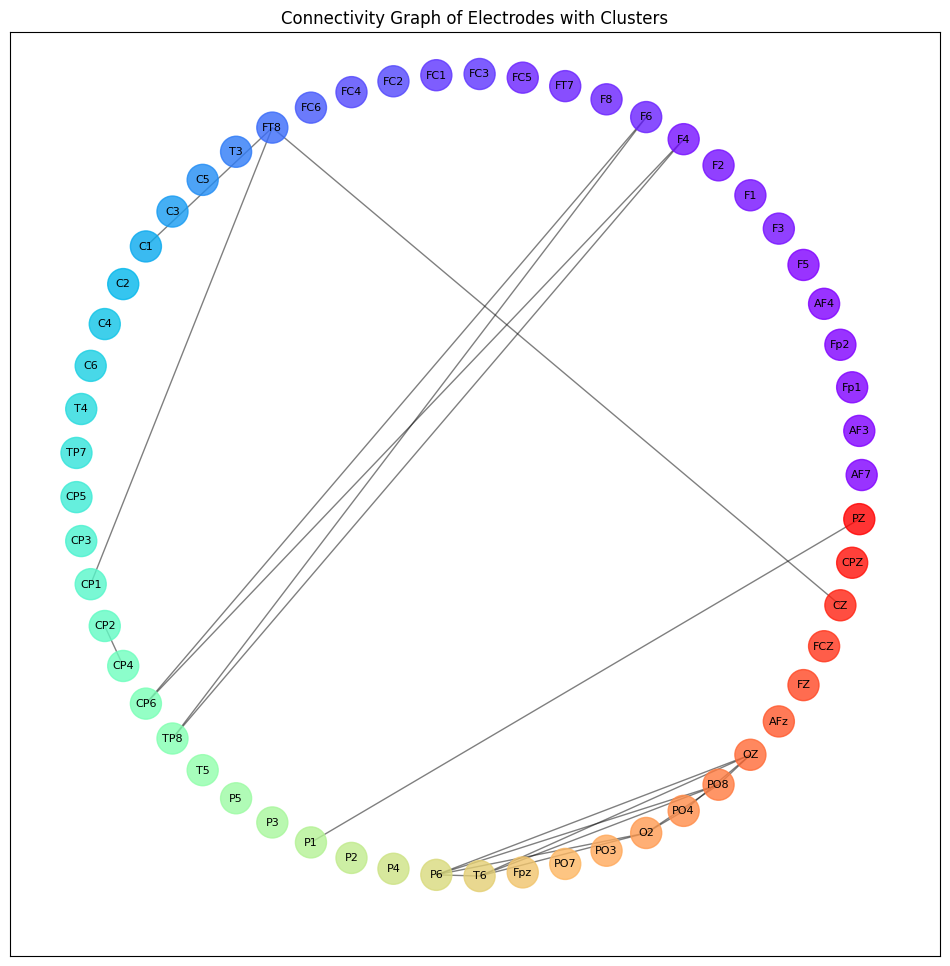

In [57]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
from scipy.spatial.distance import squareform

# Load the CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
np.fill_diagonal(connectivity_matrix.values, 0)

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Create a graph using networkx
G = nx.from_pandas_adjacency(binary_matrix)

# Positioning of nodes on the graph
pos = nx.circular_layout(G)

# Perform community detection using greedy modularity
communities = list(greedy_modularity_communities(G))

# Define electrode clusters based on your specified regions
clusters = {
    "left_frontal": ["FP1", "AF3", "AF7", "F1", "F5", "F3", "F7", "FT7", "FC5", "FC3", "FC1"],
    "right_frontal": ["FP2", "AF4", "AF8", "F2", "F4", "F6", "F8", "F8", "FC2", "FC4", "FC6", "FT8"],
    "middle_frontal": ["AFz", "Fpz", "Fz", "FCz"],
    "left_temporal": ["T3", "TP7", "CP5", "C5"],
    "right_temporal": ["T4", "TP8", "C6", "CP6"],
    "middle_central": ["Cz"],
    "left_central_parietal": ["C1", "C3", "CP3", "CP1"],
    "right_central_parietal": ["C2", "C4", "CP2", "CP4"],
    "middle_central_parietal": ["CPz", "Pz"],
    "left_parietal_occipital": ["P1", "P3", "P5", "T5", "PO3", "PO7", "O1"],
    "right_parietal_occipital": ["P2", "P4", "P6", "T6", "PO4", "PO8", "O2"],
    "middle_parietal_occipital": ["POz", "Oz"]
}

# Assign each electrode to a cluster based on community detection
for i, community in enumerate(communities):
    for electrode in community:
        for cluster, electrode_list in clusters.items():
            if electrode in electrode_list:
                clusters[cluster].append(electrode)

## Draw the graph with nodes colored by clusters
colors = [cluster_id for cluster_id, community in enumerate(communities) for electrode in community]
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=colors, cmap=plt.cm.rainbow, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Connectivity Graph of Electrodes with Clusters')
plt.show()




In [67]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Load the connectivity matrix file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
connectivity_matrix.values[np.diag_indices_from(connectivity_matrix)] = 0

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Create a graph using networkx
G = nx.from_pandas_adjacency(binary_matrix)

# Define clusters based on your specified regions
clusters = {
    'left_frontal': ['FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1'],
    'right_frontal': ['FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8'],
    'middle_frontal': ['AFz', 'Fpz', 'Fz', 'FCz'],
    'left_temporal': ['T3', 'TP7', 'CP5', 'C5'],
    'right_temporal': ['T4', 'TP8', 'C6', 'CP6'],
    'middle_central': ['Cz'],
    'left_central_parietal': ['C1', 'C3', 'CP3', 'CP1'],
    'right_central_parietal': ['C2', 'C4', 'CP2', 'CP4'],
    'middle_central_parietal': ['CPz', 'Pz'],
    'left_parietal_occipital': ['P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1'],
    'right_parietal_occipital': ['P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2'],
    'middle_parietal_occipital': ['POz', 'Oz']
}

# Add cluster information to nodes
for node, cluster in nx.get_node_attributes(G, 'cluster').items():
    for cluster_name, cluster_nodes in clusters.items():
        if node in cluster_nodes:
            G.nodes[node]['cluster'] = cluster_name

# Positioning of nodes on the graph
pos = nx.shell_layout(G)

# Get cluster information for each node
node_cluster_mapping = nx.get_node_attributes(G, 'cluster')
node_colors = [node_cluster_mapping[node] for node in G.nodes]

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, cmap=plt.cm.rainbow, font_size=8)
plt.title('Connectivity Graph with Clusters')
plt.show()


KeyError: ignored

ValueError: ignored

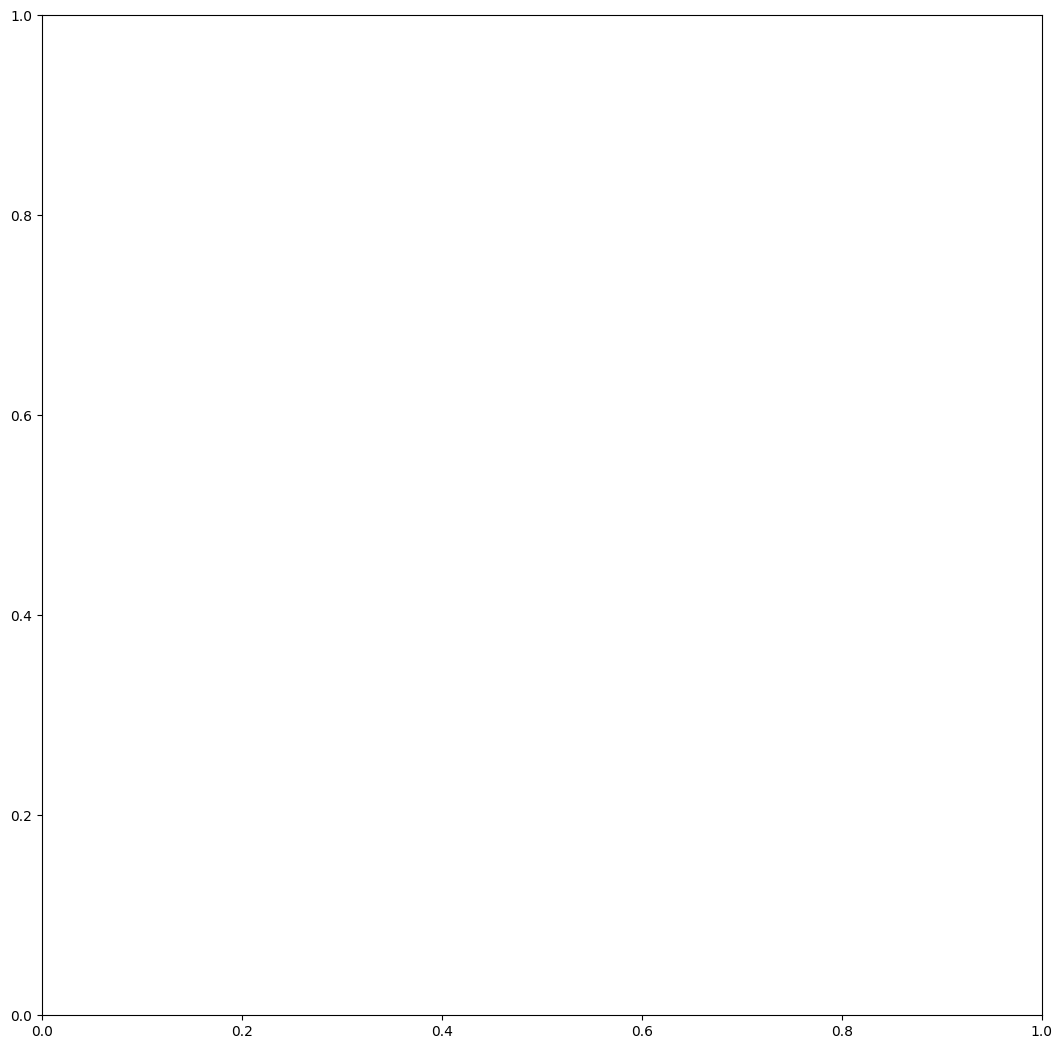

In [68]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Load the connectivity matrix file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
connectivity_matrix.values[np.diag_indices_from(connectivity_matrix)] = 0

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Create a graph using networkx
G = nx.from_pandas_adjacency(binary_matrix)

# Define clusters based on your specified regions
clusters = {
    'left_frontal': ['FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1'],
    'right_frontal': ['FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8'],
    'middle_frontal': ['AFz', 'Fpz', 'Fz', 'FCz'],
    'left_temporal': ['T3', 'TP7', 'CP5', 'C5'],
    'right_temporal': ['T4', 'TP8', 'C6', 'CP6'],
    'middle_central': ['Cz'],
    'left_central_parietal': ['C1', 'C3', 'CP3', 'CP1'],
    'right_central_parietal': ['C2', 'C4', 'CP2', 'CP4'],
    'middle_central_parietal': ['CPz', 'Pz'],
    'left_parietal_occipital': ['P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1'],
    'right_parietal_occipital': ['P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2'],
    'middle_parietal_occipital': ['POz', 'Oz']
}

# Assign nodes to clusters
default_cluster = 'other'
for node in G.nodes:
    assigned_cluster = default_cluster
    for cluster_name, cluster_nodes in clusters.items():
        if node in cluster_nodes:
            assigned_cluster = cluster_name
            break
    G.nodes[node]['cluster'] = assigned_cluster

# Positioning of nodes on the graph
pos = nx.shell_layout(G)

# Get cluster information for each node
node_cluster_mapping = nx.get_node_attributes(G, 'cluster')
node_colors = [node_cluster_mapping[node] for node in G.nodes]

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, cmap=plt.cm.rainbow, font_size=8)
plt.title('Connectivity Graph with Clusters')
plt.show()


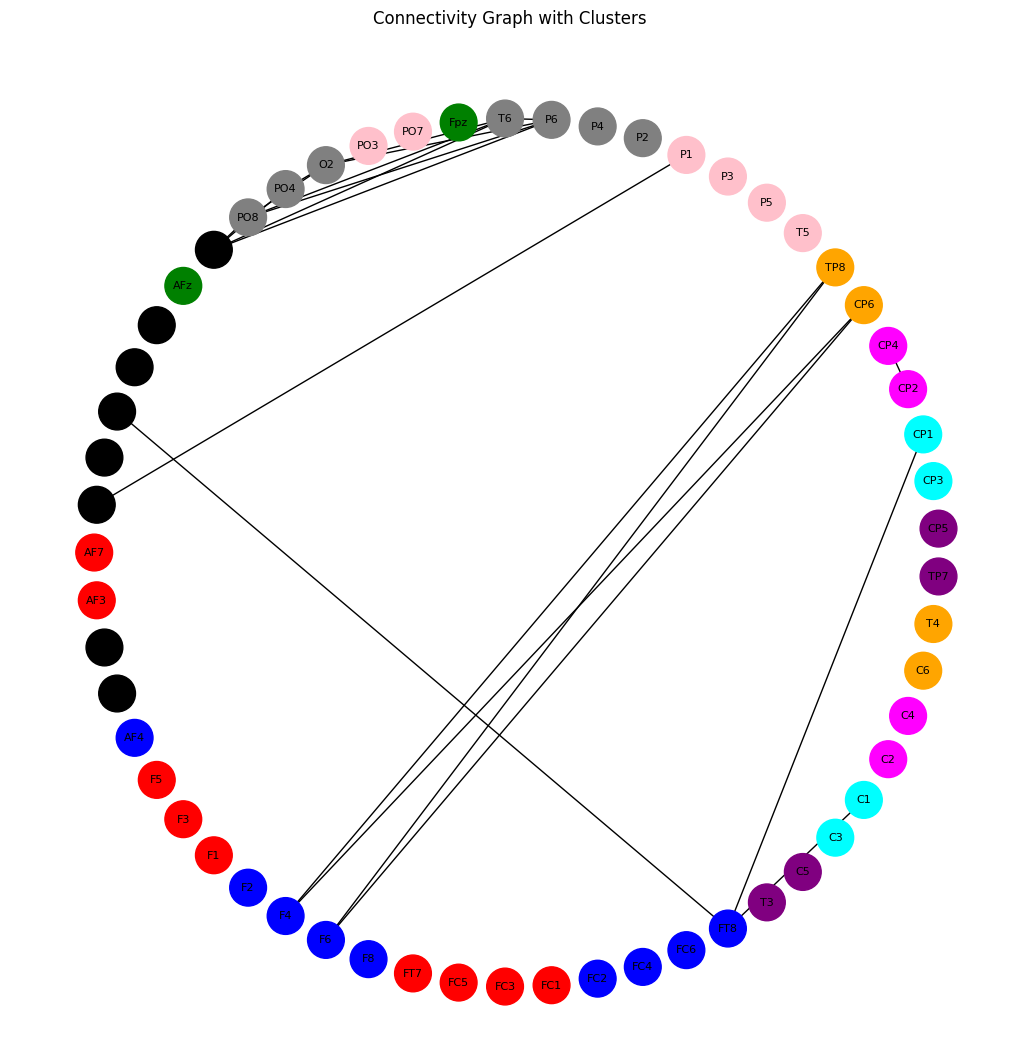

In [69]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Load the connectivity matrix file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
connectivity_matrix.values[np.diag_indices_from(connectivity_matrix)] = 0

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Create a graph using networkx
G = nx.from_pandas_adjacency(binary_matrix)

# Define clusters based on your specified regions
clusters = {
    'left_frontal': ['FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1'],
    'right_frontal': ['FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8'],
    'middle_frontal': ['AFz', 'Fpz', 'Fz', 'FCz'],
    'left_temporal': ['T3', 'TP7', 'CP5', 'C5'],
    'right_temporal': ['T4', 'TP8', 'C6', 'CP6'],
    'middle_central': ['Cz'],
    'left_central_parietal': ['C1', 'C3', 'CP3', 'CP1'],
    'right_central_parietal': ['C2', 'C4', 'CP2', 'CP4'],
    'middle_central_parietal': ['CPz', 'Pz'],
    'left_parietal_occipital': ['P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1'],
    'right_parietal_occipital': ['P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2'],
    'middle_parietal_occipital': ['POz', 'Oz']
}

# Assign nodes to clusters
default_cluster = 'other'
for node in G.nodes:
    assigned_cluster = default_cluster
    for cluster_name, cluster_nodes in clusters.items():
        if node in cluster_nodes:
            assigned_cluster = cluster_name
            break
    G.nodes[node]['cluster'] = assigned_cluster

# Positioning of nodes on the graph
pos = nx.shell_layout(G)

# Get cluster information for each node
node_cluster_mapping = nx.get_node_attributes(G, 'cluster')

# Map cluster names to colors
cluster_colors = {
    'left_frontal': 'red',
    'right_frontal': 'blue',
    'middle_frontal': 'green',
    'left_temporal': 'purple',
    'right_temporal': 'orange',
    'middle_central': 'yellow',
    'left_central_parietal': 'cyan',
    'right_central_parietal': 'magenta',
    'middle_central_parietal': 'brown',
    'left_parietal_occipital': 'pink',
    'right_parietal_occipital': 'gray',
    'middle_parietal_occipital': 'lime',
    'other': 'black'
}

# Assign colors to nodes based on their clusters
node_colors = [cluster_colors[node_cluster_mapping[node]] for node in G.nodes]

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, font_size=8)
plt.title('Connectivity Graph with Clusters')
plt.show()


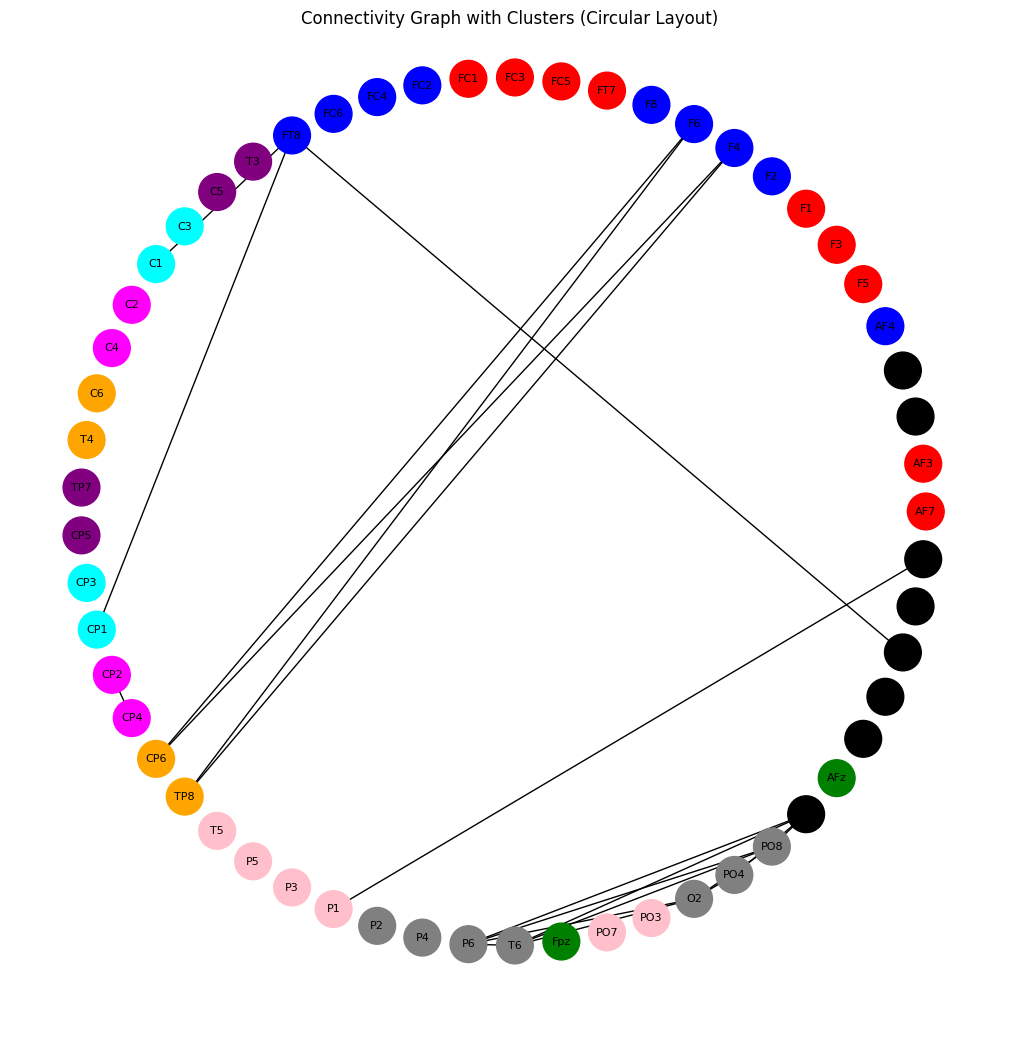

In [70]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Load the connectivity matrix file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
connectivity_matrix.values[np.diag_indices_from(connectivity_matrix)] = 0

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Create a graph using networkx
G = nx.from_pandas_adjacency(binary_matrix)

# Define clusters based on your specified regions
clusters = {
    'left_frontal': ['FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1'],
    'right_frontal': ['FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8'],
    'middle_frontal': ['AFz', 'Fpz', 'Fz', 'FCz'],
    'left_temporal': ['T3', 'TP7', 'CP5', 'C5'],
    'right_temporal': ['T4', 'TP8', 'C6', 'CP6'],
    'middle_central': ['Cz'],
    'left_central_parietal': ['C1', 'C3', 'CP3', 'CP1'],
    'right_central_parietal': ['C2', 'C4', 'CP2', 'CP4'],
    'middle_central_parietal': ['CPz', 'Pz'],
    'left_parietal_occipital': ['P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1'],
    'right_parietal_occipital': ['P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2'],
    'middle_parietal_occipital': ['POz', 'Oz']
}

# Assign nodes to clusters
default_cluster = 'other'
for node in G.nodes:
    assigned_cluster = default_cluster
    for cluster_name, cluster_nodes in clusters.items():
        if node in cluster_nodes:
            assigned_cluster = cluster_name
            break
    G.nodes[node]['cluster'] = assigned_cluster

# Positioning of nodes on the graph
pos = nx.circular_layout(G)  # Circular layout for all nodes

# Get cluster information for each node
node_cluster_mapping = nx.get_node_attributes(G, 'cluster')

# Map cluster names to colors
cluster_colors = {
    'left_frontal': 'red',
    'right_frontal': 'blue',
    'middle_frontal': 'green',
    'left_temporal': 'purple',
    'right_temporal': 'orange',
    'middle_central': 'yellow',
    'left_central_parietal': 'cyan',
    'right_central_parietal': 'magenta',
    'middle_central_parietal': 'brown',
    'left_parietal_occipital': 'pink',
    'right_parietal_occipital': 'gray',
    'middle_parietal_occipital': 'lime',
    'other': 'black'
}

# Assign colors to nodes based on their clusters
node_colors = [cluster_colors[node_cluster_mapping[node]] for node in G.nodes]

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, font_size=8)
plt.title('Connectivity Graph with Clusters (Circular Layout)')
plt.show()


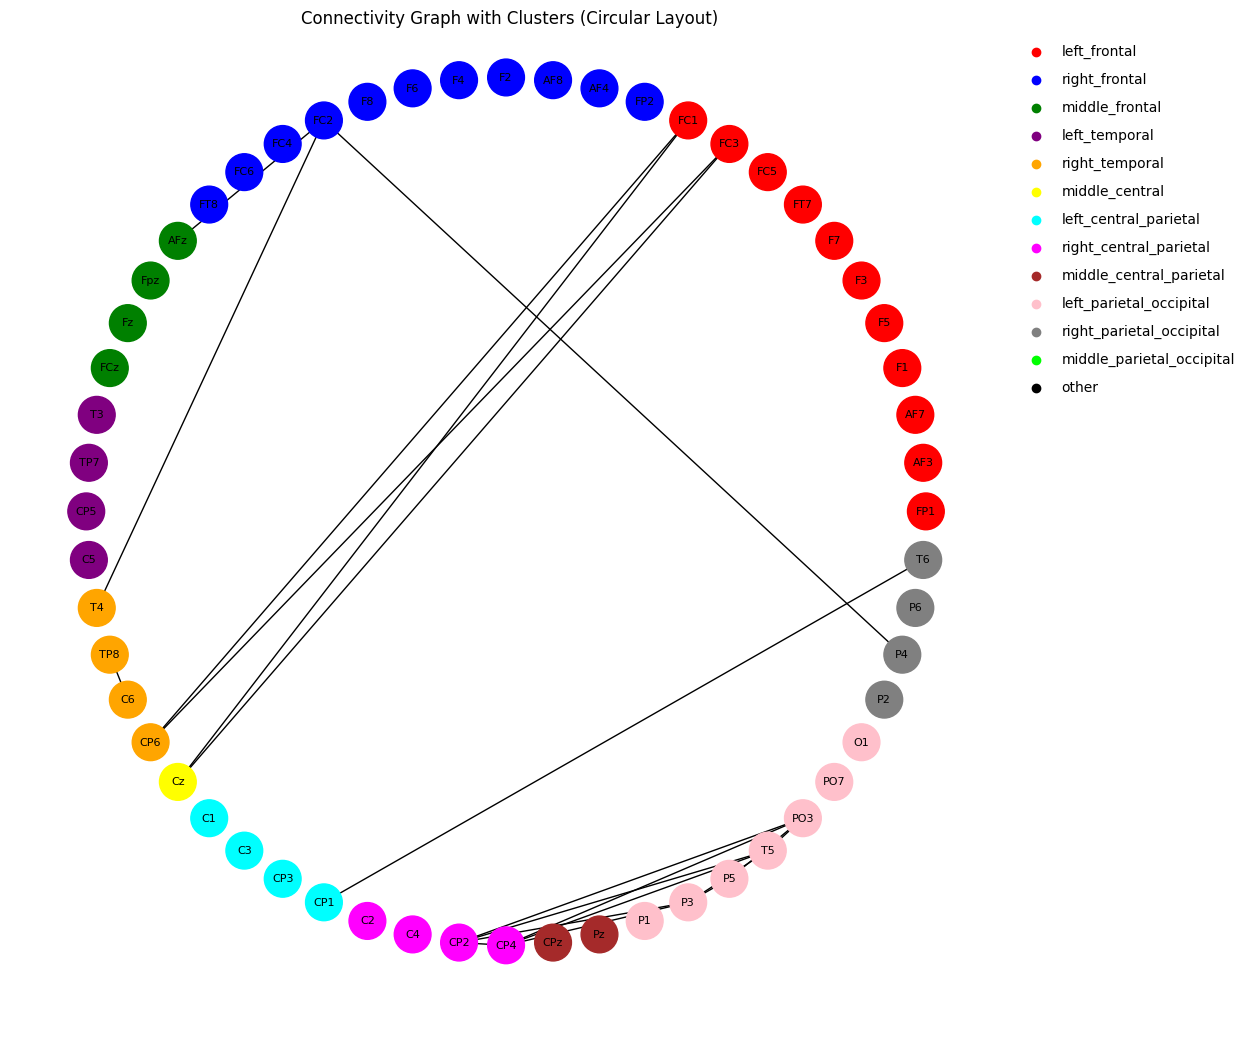

In [98]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the connectivity matrix file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
connectivity_matrix.values[np.diag_indices_from(connectivity_matrix)] = 0

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Create a graph using networkx
G = nx.from_pandas_adjacency(binary_matrix)

# Define the order of electrodes
electrode_order = [
    'FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1',
    'FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8',
    'AFz', 'Fpz', 'Fz', 'FCz', 'T3', 'TP7', 'CP5', 'C5', 'T4', 'TP8', 'C6', 'CP6',
    'Cz', 'C1', 'C3', 'CP3', 'CP1', 'C2', 'C4', 'CP2', 'CP4', 'CPz', 'Pz',
    'P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1', 'P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2', 'POz', 'Oz'
]

# Arrange nodes in the specified order
G = nx.relabel_nodes(G, {node: electrode_order[index] for index, node in enumerate(G.nodes)})

# Define clusters based on your specified regions
clusters = {
    'left_frontal': ['FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1'],
    'right_frontal': ['FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8'],
    'middle_frontal': ['AFz', 'Fpz', 'Fz', 'FCz'],
    'left_temporal': ['T3', 'TP7', 'CP5', 'C5'],
    'right_temporal': ['T4', 'TP8', 'C6', 'CP6'],
    'middle_central': ['Cz'],
    'left_central_parietal': ['C1', 'C3', 'CP3', 'CP1'],
    'right_central_parietal': ['C2', 'C4', 'CP2', 'CP4'],
    'middle_central_parietal': ['CPz', 'Pz'],
    'left_parietal_occipital': ['P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1'],
    'right_parietal_occipital': ['P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2'],
    'middle_parietal_occipital': ['POz', 'Oz']
}

# Assign nodes to clusters
default_cluster = 'other'
for node in G.nodes:
    assigned_cluster = default_cluster
    for cluster_name, cluster_nodes in clusters.items():
        if node in cluster_nodes:
            assigned_cluster = cluster_name
            break
    G.nodes[node]['cluster'] = assigned_cluster

# Positioning of nodes on the graph
pos = nx.circular_layout(G)  # Circular layout for all nodes

# Get cluster information for each node
node_cluster_mapping = nx.get_node_attributes(G, 'cluster')

# Map cluster names to colors
cluster_colors = {
    'left_frontal': 'red',
    'right_frontal': 'blue',
    'middle_frontal': 'green',
    'left_temporal': 'purple',
    'right_temporal': 'orange',
    'middle_central': 'yellow',
    'left_central_parietal': 'cyan',
    'right_central_parietal': 'magenta',
    'middle_central_parietal': 'brown',
    'left_parietal_occipital': 'pink',
    'right_parietal_occipital': 'gray',
    'middle_parietal_occipital': 'lime',
    'other': 'black'
}

# Assign colors to nodes based on their clusters
node_colors = [cluster_colors[node_cluster_mapping[node]] for node in G.nodes]

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, font_size=8)

# Draw legend for clusters
for cluster_name, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=cluster_name)

plt.title('Connectivity Graph with Clusters (Circular Layout)')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


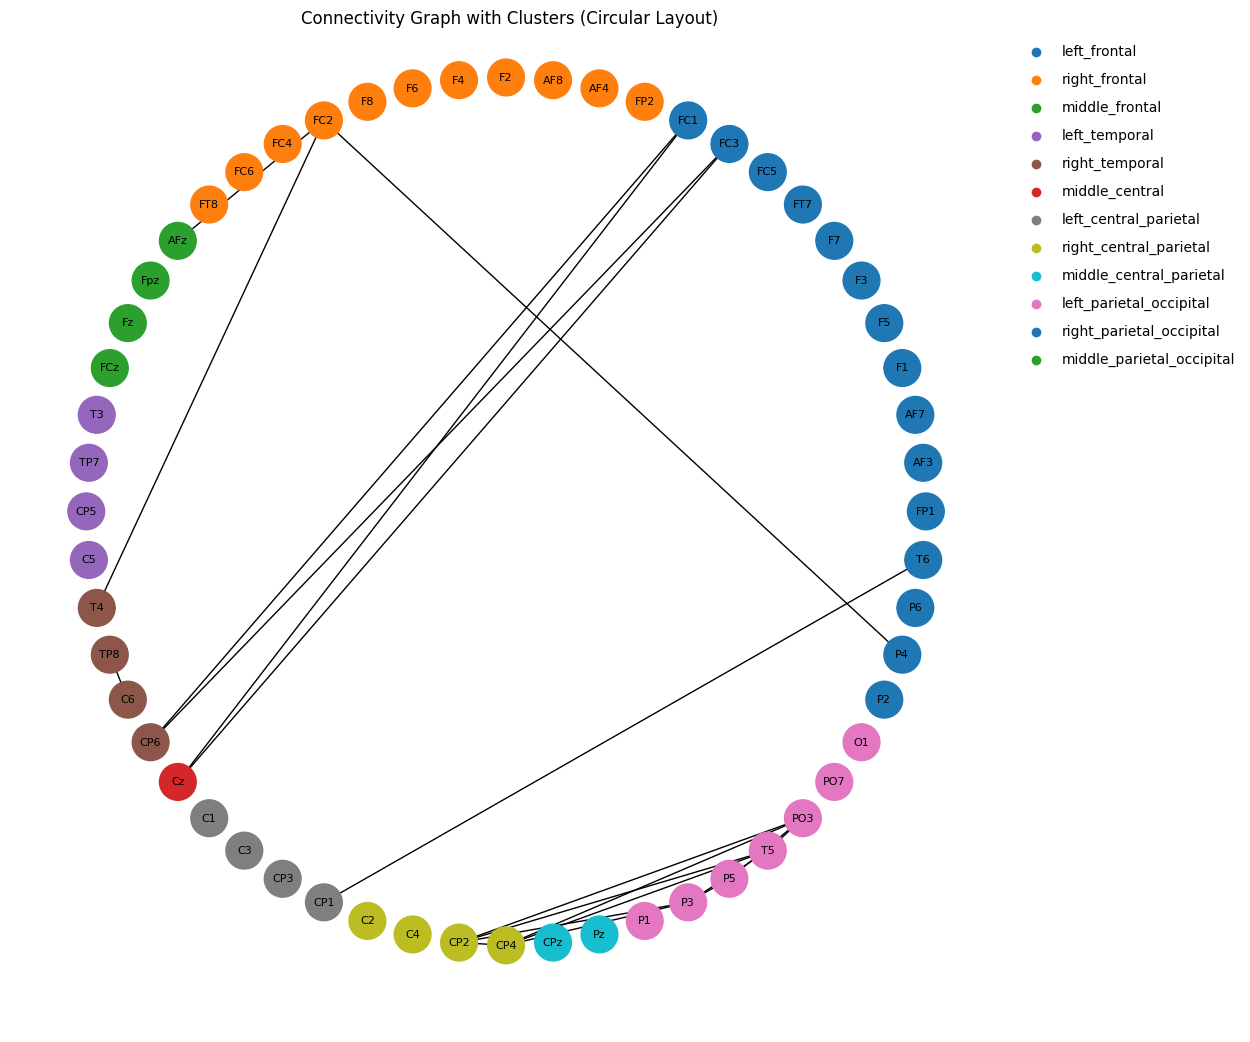

In [103]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the connectivity matrix file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
connectivity_matrix.values[np.diag_indices_from(connectivity_matrix)] = 0

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Create a graph using networkx
G = nx.from_pandas_adjacency(binary_matrix)

# Define the order of electrodes
electrode_order = [
    'FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1',
    'FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8',
    'AFz', 'Fpz', 'Fz', 'FCz', 'T3', 'TP7', 'CP5', 'C5', 'T4', 'TP8', 'C6', 'CP6',
    'Cz', 'C1', 'C3', 'CP3', 'CP1', 'C2', 'C4', 'CP2', 'CP4', 'CPz', 'Pz',
    'P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1', 'P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2', 'POz', 'Oz'
]

# Arrange nodes in the specified order
G = nx.relabel_nodes(G, {node: electrode_order[index] for index, node in enumerate(G.nodes)})

# Define clusters based on your specified regions
clusters = {
    'left_frontal': ['FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1'],
    'right_frontal': ['FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8'],
    'middle_frontal': ['AFz', 'Fpz', 'Fz', 'FCz'],
    'left_temporal': ['T3', 'TP7', 'CP5', 'C5'],
    'right_temporal': ['T4', 'TP8', 'C6', 'CP6'],
    'middle_central': ['Cz'],
    'left_central_parietal': ['C1', 'C3', 'CP3', 'CP1'],
    'right_central_parietal': ['C2', 'C4', 'CP2', 'CP4'],
    'middle_central_parietal': ['CPz', 'Pz'],
    'left_parietal_occipital': ['P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1'],
    'right_parietal_occipital': ['P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2'],
    'middle_parietal_occipital': ['POz', 'Oz']
}

# Assign nodes to clusters
default_cluster = 'other'
for node in G.nodes:
    assigned_cluster = default_cluster
    for cluster_name, cluster_nodes in clusters.items():
        if node in cluster_nodes:
            assigned_cluster = cluster_name
            break
    G.nodes[node]['cluster'] = assigned_cluster

# Positioning of nodes on the graph
pos = nx.circular_layout(G)  # Circular layout for all nodes

# Get cluster information for each node
node_cluster_mapping = nx.get_node_attributes(G, 'cluster')

# Map cluster names to colors
cluster_colors = {
    'left_frontal': '#1f77b4',   # blue
    'right_frontal': '#ff7f0e',  # orange
    'middle_frontal': '#2ca02c', # green
    'left_temporal': '#9467bd',  # purple
    'right_temporal': '#8c564b', # brown
    'middle_central': '#d62728',  # red
    'left_central_parietal': '#7f7f7f',   # gray
    'right_central_parietal': '#bcbd22',  # olive
    'middle_central_parietal': '#17becf', # teal
    'left_parietal_occipital': '#e377c2', # pink
    'right_parietal_occipital': '#1f77b4',# blue (reuse)
    'middle_parietal_occipital': '#2ca02c' # green (reuse)
}

# Assign colors to nodes based on their clusters
node_colors = [cluster_colors[node_cluster_mapping[node]] for node in G.nodes]

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, font_size=8)

# Draw legend for clusters
for cluster_name, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=cluster_name)

plt.title('Connectivity Graph with Clusters (Circular Layout)')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
<ipython-input-104-1c0f16086f23>:83: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.05, shrink=0.8)
<ipython-input-104-1c0f16086f23>:88: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=cluster_name,

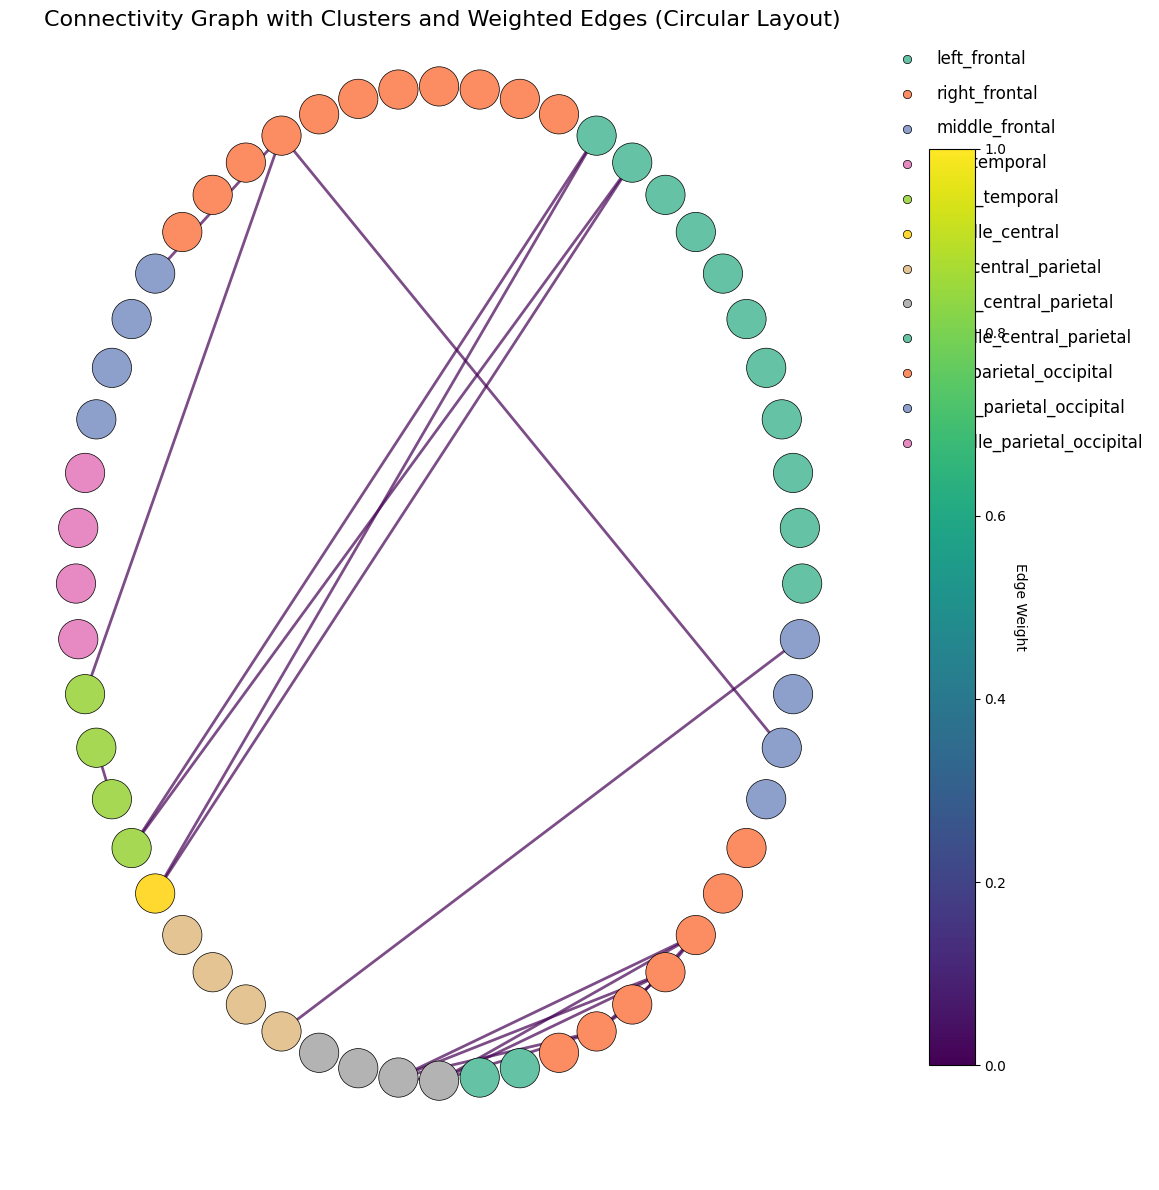

In [104]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Load the connectivity matrix file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
connectivity_matrix.values[np.diag_indices_from(connectivity_matrix)] = 0

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Create a graph using networkx
G = nx.from_pandas_adjacency(binary_matrix)

# Define the order of electrodes
electrode_order = [
    'FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1',
    'FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8',
    'AFz', 'Fpz', 'Fz', 'FCz', 'T3', 'TP7', 'CP5', 'C5', 'T4', 'TP8', 'C6', 'CP6',
    'Cz', 'C1', 'C3', 'CP3', 'CP1', 'C2', 'C4', 'CP2', 'CP4', 'CPz', 'Pz',
    'P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1', 'P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2', 'POz', 'Oz'
]

# Arrange nodes in the specified order
G = nx.relabel_nodes(G, {node: electrode_order[index] for index, node in enumerate(G.nodes)})

# Define clusters based on your specified regions
clusters = {
    'left_frontal': ['FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1'],
    'right_frontal': ['FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8'],
    'middle_frontal': ['AFz', 'Fpz', 'Fz', 'FCz'],
    'left_temporal': ['T3', 'TP7', 'CP5', 'C5'],
    'right_temporal': ['T4', 'TP8', 'C6', 'CP6'],
    'middle_central': ['Cz'],
    'left_central_parietal': ['C1', 'C3', 'CP3', 'CP1'],
    'right_central_parietal': ['C2', 'C4', 'CP2', 'CP4'],
    'middle_central_parietal': ['CPz', 'Pz'],
    'left_parietal_occipital': ['P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1'],
    'right_parietal_occipital': ['P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2'],
    'middle_parietal_occipital': ['POz', 'Oz']
}

# Assign nodes to clusters
default_cluster = 'other'
for node in G.nodes:
    assigned_cluster = default_cluster
    for cluster_name, cluster_nodes in clusters.items():
        if node in cluster_nodes:
            assigned_cluster = cluster_name
            break
    G.nodes[node]['cluster'] = assigned_cluster

# Positioning of nodes on the graph
pos = nx.circular_layout(G)  # Circular layout for all nodes

# Get cluster information for each node
node_cluster_mapping = nx.get_node_attributes(G, 'cluster')

# Map cluster names to colors using Seaborn color palette
palette = sns.color_palette("Set2", n_colors=len(clusters))
cluster_colors = {cluster_name: palette[i] for i, (cluster_name, _) in enumerate(clusters.items())}

# Assign colors to nodes based on their clusters
node_colors = [cluster_colors[node_cluster_mapping[node]] for node in G.nodes]

# Draw the graph with a color bar for edge weights
plt.figure(figsize=(12, 12))
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_nodes(G, pos, node_size=800, node_color=node_colors, cmap=plt.cm.Set2, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(G, pos, width=[2 * G[u][v]['weight'] for u, v in G.edges()], edge_color=edge_weights, edge_cmap=plt.cm.viridis, alpha=0.7)

# Draw color bar for edge weights
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array(edge_weights)
cbar = plt.colorbar(sm, orientation='vertical', pad=0.05, shrink=0.8)
cbar.set_label('Edge Weight', rotation=270, labelpad=15)

# Draw legend for clusters
for cluster_name, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=cluster_name, edgecolors='black', linewidths=0.5)

plt.title('Connectivity Graph with Clusters and Weighted Edges (Circular Layout)', fontsize=16)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
<ipython-input-105-1d221433b6e6>:83: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.05, shrink=0.8)
<ipython-input-105-1d221433b6e6>:88: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=cluster_name,

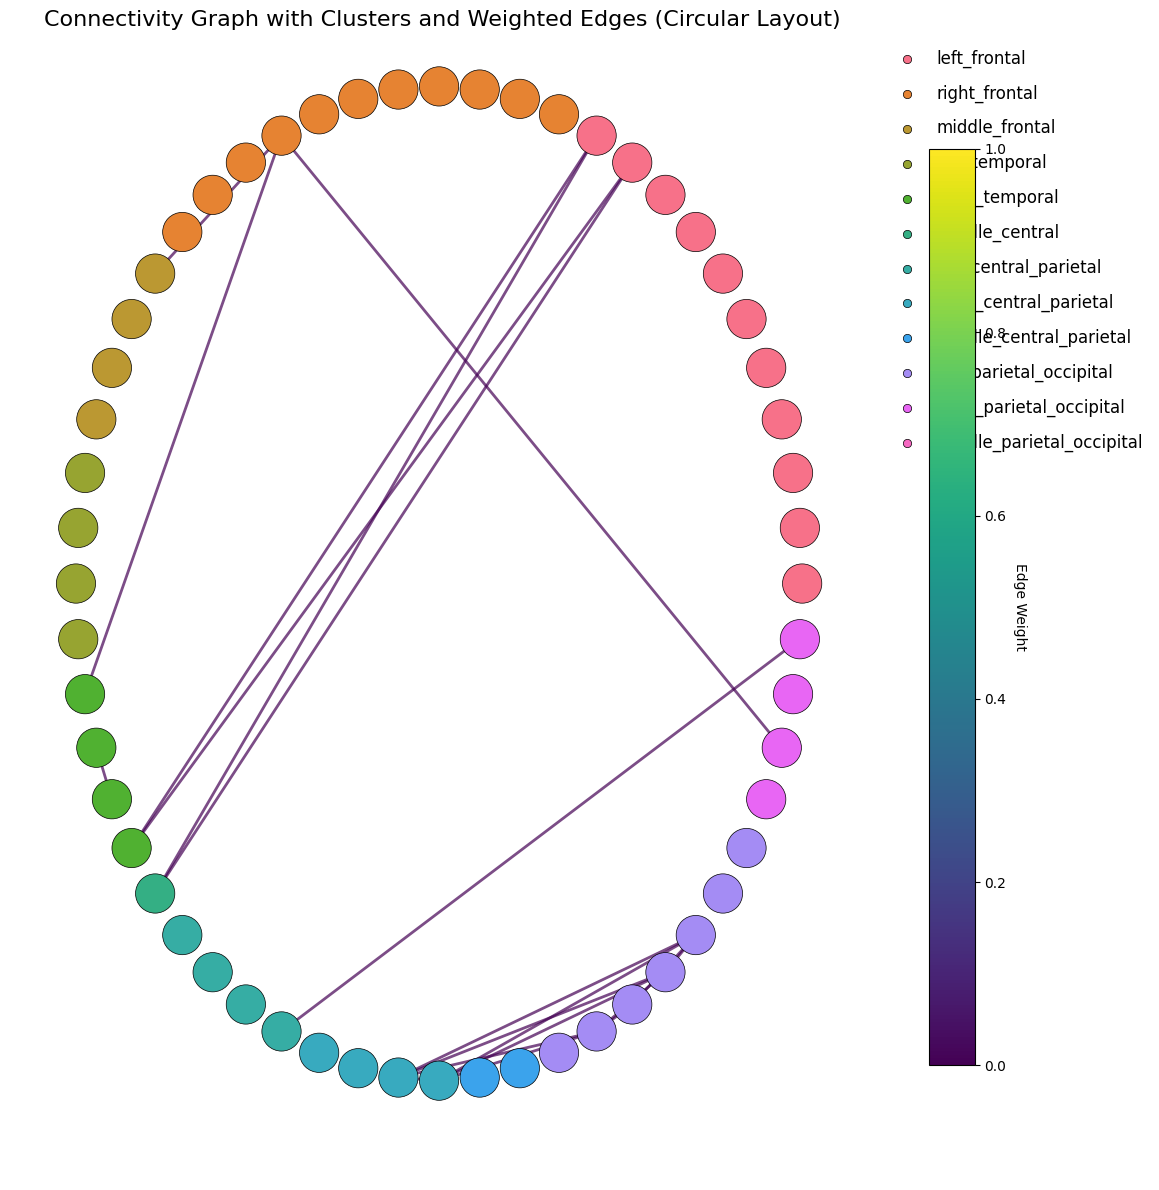

In [105]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Load the connectivity matrix file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
connectivity_matrix.values[np.diag_indices_from(connectivity_matrix)] = 0

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Create a graph using networkx
G = nx.from_pandas_adjacency(binary_matrix)

# Define the order of electrodes
electrode_order = [
    'FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1',
    'FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8',
    'AFz', 'Fpz', 'Fz', 'FCz', 'T3', 'TP7', 'CP5', 'C5', 'T4', 'TP8', 'C6', 'CP6',
    'Cz', 'C1', 'C3', 'CP3', 'CP1', 'C2', 'C4', 'CP2', 'CP4', 'CPz', 'Pz',
    'P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1', 'P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2', 'POz', 'Oz'
]

# Arrange nodes in the specified order
G = nx.relabel_nodes(G, {node: electrode_order[index] for index, node in enumerate(G.nodes)})

# Define clusters based on your specified regions
clusters = {
    'left_frontal': ['FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1'],
    'right_frontal': ['FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8'],
    'middle_frontal': ['AFz', 'Fpz', 'Fz', 'FCz'],
    'left_temporal': ['T3', 'TP7', 'CP5', 'C5'],
    'right_temporal': ['T4', 'TP8', 'C6', 'CP6'],
    'middle_central': ['Cz'],
    'left_central_parietal': ['C1', 'C3', 'CP3', 'CP1'],
    'right_central_parietal': ['C2', 'C4', 'CP2', 'CP4'],
    'middle_central_parietal': ['CPz', 'Pz'],
    'left_parietal_occipital': ['P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1'],
    'right_parietal_occipital': ['P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2'],
    'middle_parietal_occipital': ['POz', 'Oz']
}

# Assign nodes to clusters
default_cluster = 'other'
for node in G.nodes:
    assigned_cluster = default_cluster
    for cluster_name, cluster_nodes in clusters.items():
        if node in cluster_nodes:
            assigned_cluster = cluster_name
            break
    G.nodes[node]['cluster'] = assigned_cluster

# Positioning of nodes on the graph
pos = nx.circular_layout(G)  # Circular layout for all nodes

# Get cluster information for each node
node_cluster_mapping = nx.get_node_attributes(G, 'cluster')

# Map cluster names to colors using Seaborn color palette
palette = sns.color_palette("husl", n_colors=len(clusters))
cluster_colors = {cluster_name: palette[i] for i, (cluster_name, _) in enumerate(clusters.items())}

# Assign colors to nodes based on their clusters
node_colors = [cluster_colors[node_cluster_mapping[node]] for node in G.nodes]

# Draw the graph with a color bar for edge weights
plt.figure(figsize=(12, 12))
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_nodes(G, pos, node_size=800, node_color=node_colors, cmap=plt.cm.Set2, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(G, pos, width=[2 * G[u][v]['weight'] for u, v in G.edges()], edge_color=edge_weights, edge_cmap=plt.cm.viridis, alpha=0.7)

# Draw color bar for edge weights
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array(edge_weights)
cbar = plt.colorbar(sm, orientation='vertical', pad=0.05, shrink=0.8)
cbar.set_label('Edge Weight', rotation=270, labelpad=15)

# Draw legend for clusters
for cluster_name, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=cluster_name, edgecolors='black', linewidths=0.5)

plt.title('Connectivity Graph with Clusters and Weighted Edges (Circular Layout)', fontsize=16)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()


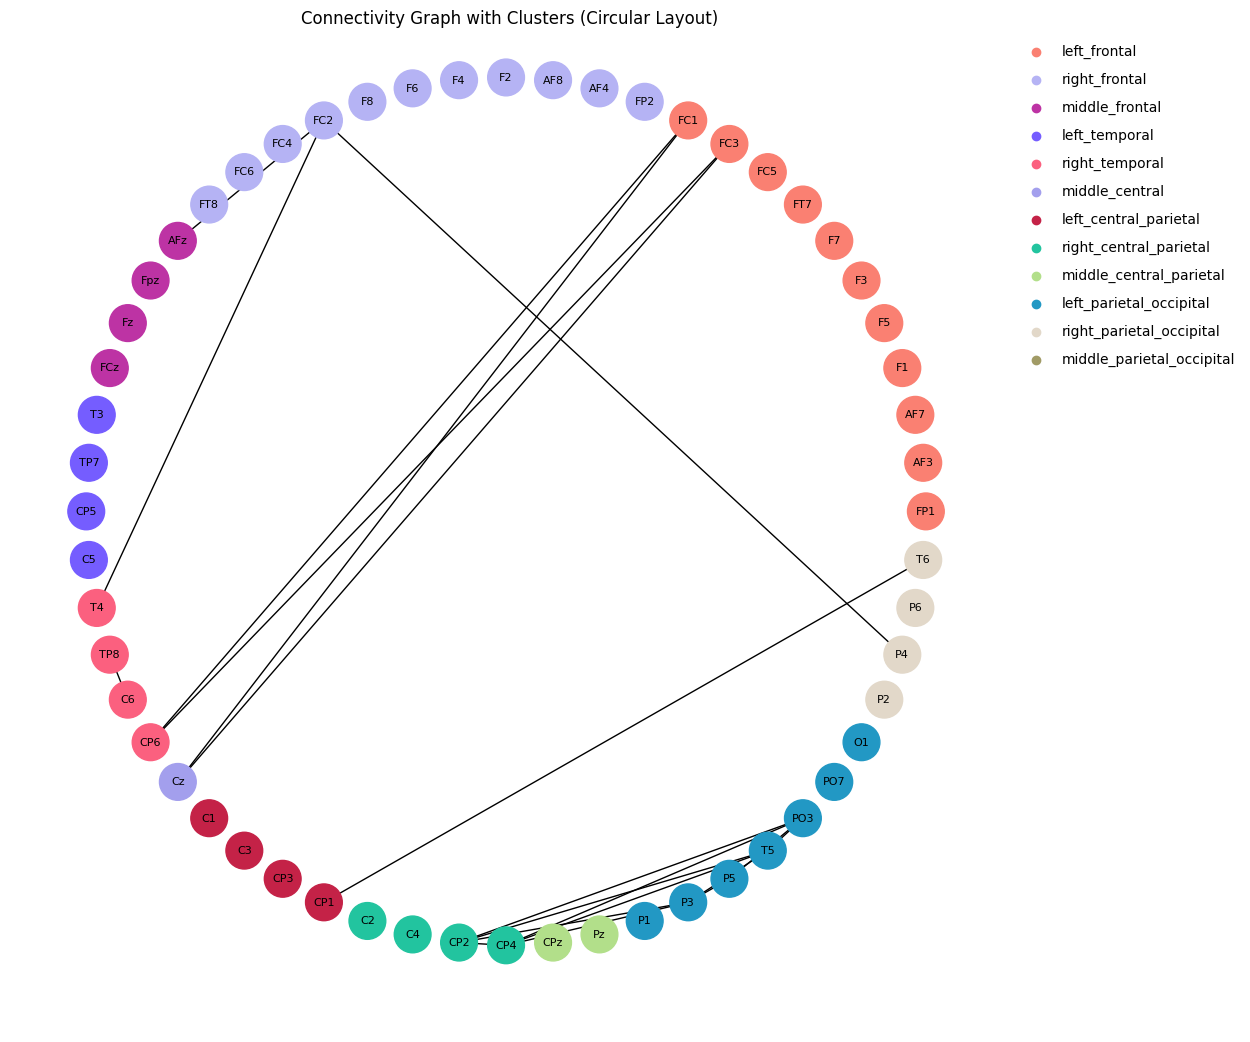

In [129]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the connectivity matrix file
file_path = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv'
connectivity_matrix = pd.read_csv(file_path, index_col=0)

# Set diagonal elements to zero (optional, depends on your preference)
connectivity_matrix.values[np.diag_indices_from(connectivity_matrix)] = 0

# Choose a threshold based on your preference
threshold = 0.5  # You can adjust this value based on your dataset and goals

# Apply thresholding to create a binary matrix
binary_matrix = (connectivity_matrix > threshold).astype(int)

# Create a graph using networkx
G = nx.from_pandas_adjacency(binary_matrix)

# Define the order of electrodes
electrode_order = [
    'FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1',
    'FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8',
    'AFz', 'Fpz', 'Fz', 'FCz', 'T3', 'TP7', 'CP5', 'C5', 'T4', 'TP8', 'C6', 'CP6',
    'Cz', 'C1', 'C3', 'CP3', 'CP1', 'C2', 'C4', 'CP2', 'CP4', 'CPz', 'Pz',
    'P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1', 'P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2', 'POz', 'Oz'
]

# Arrange nodes in the specified order
G = nx.relabel_nodes(G, {node: electrode_order[index] for index, node in enumerate(G.nodes)})

# Define clusters based on your specified regions
clusters = {
    'left_frontal': ['FP1', 'AF3', 'AF7', 'F1', 'F5', 'F3', 'F7', 'FT7', 'FC5', 'FC3', 'FC1'],
    'right_frontal': ['FP2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'F8', 'FC2', 'FC4', 'FC6', 'FT8'],
    'middle_frontal': ['AFz', 'Fpz', 'Fz', 'FCz'],
    'left_temporal': ['T3', 'TP7', 'CP5', 'C5'],
    'right_temporal': ['T4', 'TP8', 'C6', 'CP6'],
    'middle_central': ['Cz'],
    'left_central_parietal': ['C1', 'C3', 'CP3', 'CP1'],
    'right_central_parietal': ['C2', 'C4', 'CP2', 'CP4'],
    'middle_central_parietal': ['CPz', 'Pz'],
    'left_parietal_occipital': ['P1', 'P3', 'P5', 'T5', 'PO3', 'PO7', 'O1'],
    'right_parietal_occipital': ['P2', 'P4', 'P6', 'T6', 'PO4', 'PO8', 'O2'],
    'middle_parietal_occipital': ['POz', 'Oz']
}

# Assign nodes to clusters
default_cluster = 'other'
for node in G.nodes:
    assigned_cluster = default_cluster
    for cluster_name, cluster_nodes in clusters.items():
        if node in cluster_nodes:
            assigned_cluster = cluster_name
            break
    G.nodes[node]['cluster'] = assigned_cluster

# Positioning of nodes on the graph
pos = nx.circular_layout(G)  # Circular layout for all nodes

# Get cluster information for each node
node_cluster_mapping = nx.get_node_attributes(G, 'cluster')

# Map cluster names to colors
cluster_colors = {
    'left_frontal': '#fa8072',
    'right_frontal': '#b5b3f4',  # green
    'middle_frontal': '#bd33a4', # purple
    'left_temporal': '#755dff',  # orange
    'right_temporal': '#fb607f', # brown
    'middle_central': '#a39fed',  # red
    'left_central_parietal': '#c42247',   # light blue
    'right_central_parietal': '#22c49f',  # light orange
    'middle_central_parietal': '#b2df8a', # light green
    'left_parietal_occipital': '#2298c4', # light purple
    'right_parietal_occipital': '#e2d8c9',# blue (reuse)
    'middle_parietal_occipital': '#a19b66' # green (reuse)
}

# Assign colors to nodes based on their clusters
node_colors = [cluster_colors[node_cluster_mapping[node]] for node in G.nodes]

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, font_size=8)

# Draw legend for clusters
for cluster_name, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=cluster_name)

plt.title('Connectivity Graph with Clusters (Circular Layout)')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
